# TREATMANT AND CONTROL DATASETS IMPORT

In [357]:
import pandas as pd
import docx
import matplotlib.pyplot as plt

In [358]:
treatmant = pd.read_excel(
    'Treatment_Group_WorldBank.xlsx')
treatmant=treatmant.iloc[:-5 , :]

In [359]:
treatmant.drop(columns=['Country Code', 'Series Code'], inplace=True)
treatmant = treatmant.replace('..', 0)

In [360]:
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# df_num = treatmant.select_dtypes(include=numerics)
# df_num.where(df_num != 0, other=df_num.shift(1), inplace=True)
# treatmant.update(df_num)

In [362]:
treatmant['2007 [YR2007]'] = treatmant['2007 [YR2007]'].astype('float')
treatmant['2008 [YR2008]'] = treatmant['2008 [YR2008]'].astype('float')
treatmant['2009 [YR2009]'] = treatmant['2009 [YR2009]'].astype('float')
treatmant['2010 [YR2010]'] = treatmant['2010 [YR2010]'].astype('float')
treatmant['2011 [YR2011]'] = treatmant['2011 [YR2011]'].astype('float')
treatmant['2012 [YR2012]'] = treatmant['2012 [YR2012]'].astype('float')
treatmant['2013 [YR2013]'] = treatmant['2013 [YR2013]'].astype('float')
treatmant['2014 [YR2014]'] = treatmant['2014 [YR2014]'].astype('float')
treatmant['2015 [YR2015]'] = treatmant['2015 [YR2015]'].astype('float')
treatmant['2016 [YR2016]'] = treatmant['2016 [YR2016]'].astype('float')
treatmant['2017 [YR2017]'] = treatmant['2017 [YR2017]'].astype('float')
treatmant['2018 [YR2018]'] = treatmant['2018 [YR2018]'].astype('float')
treatmant['2019 [YR2019]'] = treatmant['2019 [YR2019]'].astype('float')
treatmant['2020 [YR2020]'] = treatmant['2020 [YR2020]'].astype('float')
treatmant['2021 [YR2021]'] = treatmant['2021 [YR2021]'].astype('float')

In [363]:
treatmant.rename(columns = {'2007 [YR2007]':'2007','2008 [YR2008]':'2008','2009 [YR2009]':'2009','2010 [YR2010]':'2010','2011 [YR2011]':'2011',
    '2012 [YR2012]':'2012','2013 [YR2013]':'2013','2014 [YR2014]':'2014','2015 [YR2015]':'2015','2016 [YR2016]':'2016',
                           '2017 [YR2017]':'2017', '2018 [YR2018]':'2018','2019 [YR2019]':'2019','2020 [YR2020]':'2020','2021 [YR2021]':'2021'}, inplace = True)

In [364]:
control = pd.read_excel('Comparison_Group_WordlBank.xlsx')
control=control.iloc[:-5 , :]

In [365]:
control.drop(columns=['Country Code', 'Series Code'], inplace=True)
control = control.replace('..', 0)

In [366]:
control['2007 [YR2007]'] = control['2007 [YR2007]'].astype('float')
control['2008 [YR2008]'] = control['2008 [YR2008]'].astype('float')
control['2009 [YR2009]'] = control['2009 [YR2009]'].astype('float')
control['2010 [YR2010]'] = control['2010 [YR2010]'].astype('float')
control['2011 [YR2011]'] = control['2011 [YR2011]'].astype('float')
control['2012 [YR2012]'] = control['2012 [YR2012]'].astype('float')
control['2013 [YR2013]'] = control['2013 [YR2013]'].astype('float')
control['2014 [YR2014]'] = control['2014 [YR2014]'].astype('float')
control['2015 [YR2015]'] = control['2015 [YR2015]'].astype('float')
control['2016 [YR2016]'] = control['2016 [YR2016]'].astype('float')
control['2017 [YR2017]'] = control['2017 [YR2017]'].astype('float')
control['2018 [YR2018]'] = control['2018 [YR2018]'].astype('float')
control['2019 [YR2019]'] = control['2019 [YR2019]'].astype('float')
control['2020 [YR2020]'] = control['2020 [YR2020]'].astype('float')
control['2021 [YR2021]'] = control['2021 [YR2021]'].astype('float')

In [367]:
control.rename(columns = {'2007 [YR2007]':'2007','2008 [YR2008]':'2008','2009 [YR2009]':'2009','2010 [YR2010]':'2010','2011 [YR2011]':'2011',
    '2012 [YR2012]':'2012','2013 [YR2013]':'2013','2014 [YR2014]':'2014','2015 [YR2015]':'2015','2016 [YR2016]':'2016',
                           '2017 [YR2017]':'2017', '2018 [YR2018]':'2018','2019 [YR2019]':'2019','2020 [YR2020]':'2020','2021 [YR2021]':'2021'}, inplace = True)

# Save Document Function

In [370]:
def save_document(df_name,document_name):
    # Initialise the Word document
    doc = docx.Document()
    # Initialise the table
    t = doc.add_table(rows=1, cols=df_name.shape[1])
    # Add borders
    t.style = 'TableGrid'
    # Add the column headings
    for j in range(df_name.shape[1]):
        t.cell(0, j).text = df_name.columns[j]
    # Add the body of the data frame
    for i in range(df_name.shape[0]):
        row = t.add_row()
        for j in range(df_name.shape[1]):
            cell = df_name.iat[i, j]
            row.cells[j].text = str(cell)
    # Save the Word doc
    doc.save(document_name + '.docx')

# DID FUNCTION

In [371]:
DID_df = pd.DataFrame(columns=['Series Name','Treatment Country', 'Control Country','Treatment Dif','Control Dif','DID'])

In [372]:
before_date1= '2007'
before_date2= '2009'
after_date1= '2010'
after_date2= '2012'

In [373]:
def DID(treatment,control,tre_name,con_name,series_name):
    treatment= treatment[(treatment['Series Name']== series_name) & (treatment['Country Name']== tre_name)]
    treatment.drop(['Series Name','Country Name'], axis=1,inplace=True)
    treatment=treatment.T

    control= control[(control['Series Name']== series_name) & (control['Country Name']== con_name)]
    control.drop(['Series Name','Country Name'], axis=1,inplace=True)
    control= control.T

    tre=treatment.loc[after_date1:after_date2].iloc[:,0].mean()-treatment.loc[before_date1:before_date2].iloc[:,0].mean()
    con=control.loc[after_date1:after_date2].iloc[:,0].mean()-control.loc[before_date1:before_date2].iloc[:,0].mean()
    did=tre-con
    #did= "%.2f" % did
    DID_df.loc[len(DID_df)] = [series_name,tre_name,con_name,tre,con,did]

In [374]:
control_name_ls=list(control['Country Name'].unique())

In [375]:
len(control_name_ls)

6

In [376]:
treatmant_name_ls = list(treatmant['Country Name'].unique())

In [377]:
len(treatmant_name_ls)

8

In [378]:
series_name_ls=list(control['Series Name'].unique())

In [379]:
len(series_name_ls)

5

# Paralel Trend

In [380]:
for i in series_name_ls:
    for t in treatmant_name_ls:
        for c in control_name_ls:
            DID(treatmant,control,t,c,i)


C:\Users\DilaraIsikli\AppData\Local\Temp\ipykernel_31440\3493099559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment.drop(['Series Name','Country Name'], axis=1,inplace=True)
C:\Users\DilaraIsikli\AppData\Local\Temp\ipykernel_31440\3493099559.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control.drop(['Series Name','Country Name'], axis=1,inplace=True)
C:\Users\DilaraIsikli\AppData\Local\Temp\ipykernel_31440\3493099559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [382]:
poc = DID_df[(DID_df['Treatment Dif'] > 0) & (DID_df['Control Dif'] > 0) & (abs(DID_df['DID'].astype(float))<0.5)]

In [383]:
neg = DID_df[(DID_df['Treatment Dif'] < 0) & (DID_df['Control Dif'] < 0) & (abs(DID_df['DID'].astype(float))<0.5)]

In [384]:
trend_df = pd.concat([poc,neg],axis=0)

In [385]:
trend_df.reset_index(inplace=True)

In [386]:
trend_df.drop('index',axis=1, inplace=True)

In [388]:
#save_document(trend_df,'paralel_trend')

# DID CALCULATION AFTER PARALEL TREND

In [389]:
DID_df = pd.DataFrame(columns=['Series Name','Treatment Country', 'Control Country','Treatment Dif','Control Dif','DID'])

In [390]:
before_date1= '2007'
before_date2= '2012'
after_date1= '2013'
after_date2= '2021'

In [391]:
for i in range(len(trend_df)):
    DID(treatmant,control,trend_df['Treatment Country'][i],trend_df['Control Country'][i],trend_df['Series Name'][i])

C:\Users\DilaraIsikli\AppData\Local\Temp\ipykernel_31440\3493099559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment.drop(['Series Name','Country Name'], axis=1,inplace=True)
C:\Users\DilaraIsikli\AppData\Local\Temp\ipykernel_31440\3493099559.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control.drop(['Series Name','Country Name'], axis=1,inplace=True)
C:\Users\DilaraIsikli\AppData\Local\Temp\ipykernel_31440\3493099559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

# GRAPH DISPLAY

In [394]:
columns_to_keep = ['2007', '2012', '2013', '2021']

In [423]:
DID_df[DID_df['Series Name']=='Employment in agriculture (% of total employment) (modeled ILO estimate)'].sort_values(by=['DID'], ascending=False).head(2)

,Series Name,Treatment Country,Control Country,Treatment Dif,Control Dif,DID
23,Employment in agriculture (% of total employme...,Costa Rica,Paraguay,-2.506667,-10.435,7.928333
29,Employment in agriculture (% of total employme...,Colombia,Paraguay,-5.785556,-10.435,4.649444


In [396]:
tre_employ = treatmant[(treatmant['Series Name']=='Employment in agriculture (% of total employment) (modeled ILO estimate)')
& (treatmant['Country Name']=='Costa Rica')]

tre_employ.drop(columns=['Country Name','Series Name'], inplace=True)
tre_employ = tre_employ[tre_employ.columns.intersection(columns_to_keep)]
tre_employ = tre_employ.T

C:\Users\DilaraIsikli\AppData\Local\Temp\ipykernel_31440\1482301755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tre_employ.drop(columns=['Country Name','Series Name'], inplace=True)


In [397]:
tre_employ[1]

2007    13.27
2012    10.28
2013     9.90
2021     0.00
Name: 1, dtype: float64

In [398]:
cont_employ = control[(control['Series Name']=='Employment in agriculture (% of total employment) (modeled ILO estimate)')
& (control['Country Name']=='Paraguay')]

cont_employ.drop(columns=['Country Name','Series Name'], inplace=True)
cont_employ = cont_employ[cont_employ.columns.intersection(columns_to_keep)]
cont_employ = cont_employ.T

C:\Users\DilaraIsikli\AppData\Local\Temp\ipykernel_31440\2787071569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_employ.drop(columns=['Country Name','Series Name'], inplace=True)


In [399]:
cont_employ

,11
2007,28.670000
2012,26.139999
2013,22.820000
2021,0.000000


In [400]:
DID_df[DID_df['Series Name']=='Employment in agriculture (% of total employment) (modeled ILO estimate)'].sort_values(by='DID', ascending=True, na_position='last').head(2)

,Series Name,Treatment Country,Control Country,Treatment Dif,Control Dif,DID
25,Employment in agriculture (% of total employme...,Guatemala,Argentina,-8.756666,-0.815556,-7.941111
34,Employment in agriculture (% of total employme...,Ecuador,Argentina,-6.868888,-0.815556,-6.053333
27,Employment in agriculture (% of total employme...,Guatemala,Mexico,-8.756666,-3.516111,-5.240555
26,Employment in agriculture (% of total employme...,Guatemala,Uruguay,-8.756666,-3.587778,-5.168889
36,Employment in agriculture (% of total employme...,Ecuador,Mexico,-6.868888,-3.516111,-3.352777
35,Employment in agriculture (% of total employme...,Ecuador,Uruguay,-6.868888,-3.587778,-3.281111
33,Employment in agriculture (% of total employme...,Peru,Uruguay,-6.727778,-3.587778,-3.140000
31,Employment in agriculture (% of total employme...,Peru,Chile,-6.727778,-3.766667,-2.961111
30,Employment in agriculture (% of total employme...,Colombia,Uruguay,-5.785556,-3.587778,-2.197778
28,Employment in agriculture (% of total employme...,Colombia,Chile,-5.785556,-3.766667,-2.018889


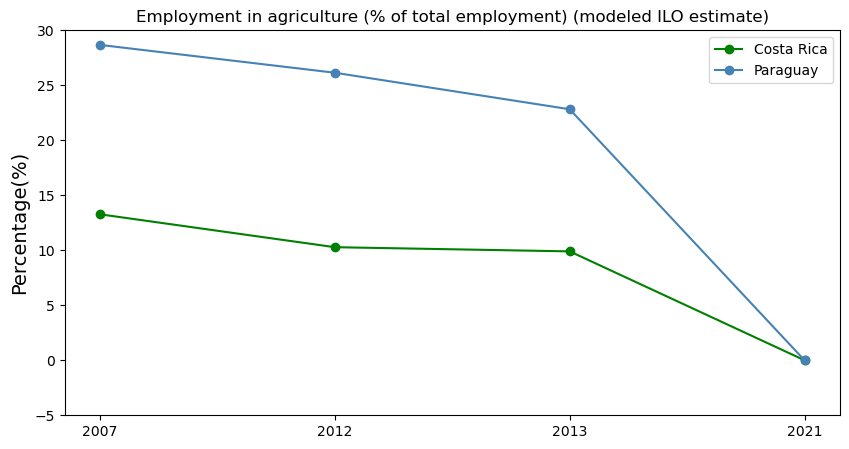

In [401]:
plt.subplots(figsize=(10, 5))
plt.plot(tre_employ[1], label='Costa Rica', color='green', marker='o')
plt.plot(cont_employ[11], label='Paraguay', color='steelblue', marker='o')
plt.title('Employment in agriculture (% of total employment) (modeled ILO estimate)', fontsize=12)
plt.legend(title='Country')
plt.ylim(-5,30)
plt.ylabel('Percentage(%)', fontsize=14)
#plt.figure(figsize=(15,100))
#plt.plot(range(10), linestyle='--', marker='o', color='b', label='line with marker')
plt.legend()

In [402]:
DID_df[DID_df['Series Name']=='Food exports (% of merchandise exports)'].sort_values(by='DID',ascending=False)

,Series Name,Treatment Country,Control Country,Treatment Dif,Control Dif,DID
37,Food exports (% of merchandise exports),Ecuador,Chile,16.222927,6.014942,10.207984
4,Food exports (% of merchandise exports),Peru,Mexico,5.303475,1.585776,3.717700
3,Food exports (% of merchandise exports),Peru,Argentina,5.303475,7.078312,-1.774837


In [403]:
tre_employ = treatmant[(treatmant['Series Name']=='Food exports (% of merchandise exports)') & (treatmant['Country Name']=='Ecuador')]

tre_employ.drop(columns=['Country Name','Series Name'], inplace=True)
tre_employ = tre_employ[tre_employ.columns.intersection(columns_to_keep)]
tre_employ = tre_employ.T

C:\Users\DilaraIsikli\AppData\Local\Temp\ipykernel_31440\90331886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tre_employ.drop(columns=['Country Name','Series Name'], inplace=True)


In [404]:
tre_employ

,37
2007,27.116463
2012,28.096527
2013,30.561522
2021,48.335774


In [405]:
cont_employ = control[(control['Series Name']=='Food exports (% of merchandise exports)')
& (control['Country Name']=='Chile')]

cont_employ.drop(columns=['Country Name','Series Name'], inplace=True)
cont_employ = cont_employ[cont_employ.columns.intersection(columns_to_keep)]
cont_employ = cont_employ.T

C:\Users\DilaraIsikli\AppData\Local\Temp\ipykernel_31440\3225864555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_employ.drop(columns=['Country Name','Series Name'], inplace=True)


In [406]:
cont_employ

,2
2007,15.078236
2012,18.249309
2013,20.399818
2021,20.150624


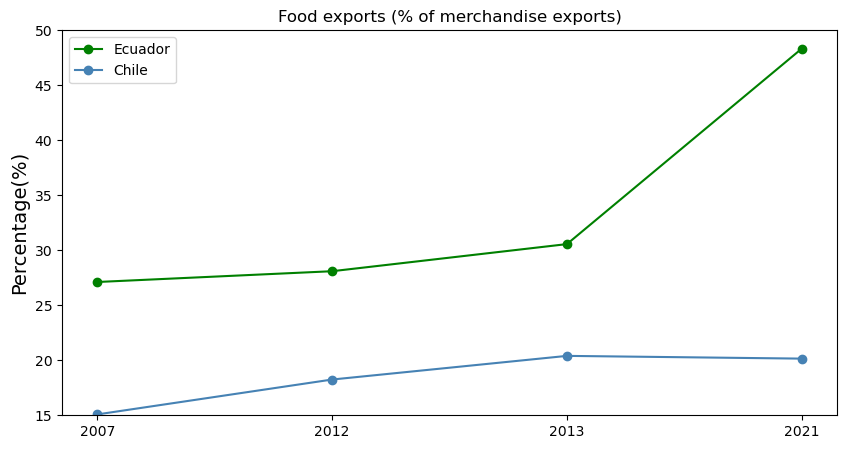

In [409]:
plt.subplots(figsize=(10, 5))
plt.plot(tre_employ[37], label='Ecuador', color='green', marker='o')
plt.plot(cont_employ[2], label='Chile', color='steelblue', marker='o')
plt.title('Food exports (% of merchandise exports)', fontsize=12)
plt.legend(title='Country')
plt.ylim(15,50)
plt.ylabel('Percentage(%)', fontsize=14)
#plt.figure(figsize=(15,100))
#plt.plot(range(10), linestyle='--', marker='o', color='b', label='line with marker')
plt.legend()

In [424]:
DID_df[DID_df['Series Name']=='Food imports (% of merchandise imports)'].sort_values(by='DID', ascending=False).head(2)

,Series Name,Treatment Country,Control Country,Treatment Dif,Control Dif,DID
39,Food imports (% of merchandise imports),Colombia,Mexico,2.324619,-0.708863,3.033482
42,Food imports (% of merchandise imports),Ecuador,Mexico,1.491812,-0.708863,2.200675


In [411]:
tre_employ = treatmant[(treatmant['Series Name']=='Food imports (% of merchandise imports)') & (treatmant['Country Name']=='Colombia')]

tre_employ.drop(columns=['Country Name','Series Name'], inplace=True)
tre_employ = tre_employ[tre_employ.columns.intersection(columns_to_keep)]
tre_employ = tre_employ.T

C:\Users\DilaraIsikli\AppData\Local\Temp\ipykernel_31440\1037686946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tre_employ.drop(columns=['Country Name','Series Name'], inplace=True)


In [412]:
tre_employ

,28
2007,9.158417
2012,10.327424
2013,9.993798
2021,13.821232


In [413]:
cont_employ = control[(control['Series Name']=='Food imports (% of merchandise imports)')
& (control['Country Name']=='Mexico')]

cont_employ.drop(columns=['Country Name','Series Name'], inplace=True)
cont_employ = cont_employ[cont_employ.columns.intersection(columns_to_keep)]
cont_employ = cont_employ.T

C:\Users\DilaraIsikli\AppData\Local\Temp\ipykernel_31440\3677240135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_employ.drop(columns=['Country Name','Series Name'], inplace=True)


In [414]:
cont_employ

,28
2007,6.484516
2012,6.165662
2013,6.587805
2021,6.414861


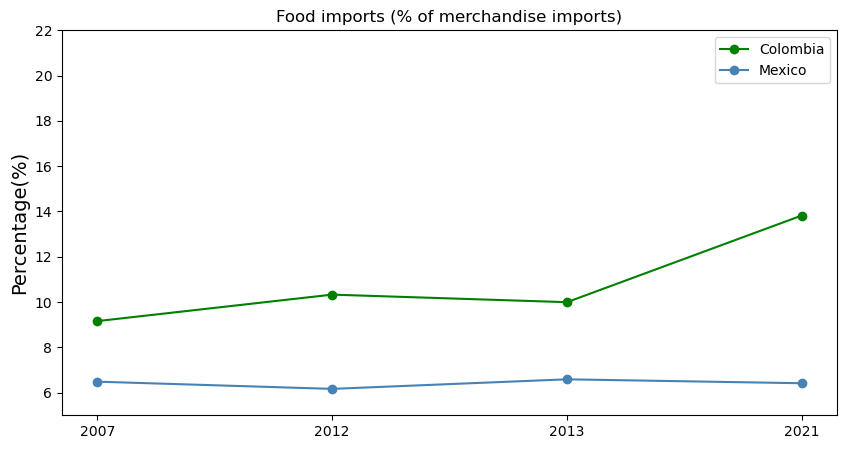

In [415]:
plt.subplots(figsize=(10, 5))
plt.plot(tre_employ[28], label='Colombia', color='green', marker='o')
plt.plot(cont_employ[28], label='Mexico', color='steelblue', marker='o')
plt.title('Food imports (% of merchandise imports)', fontsize=12)
plt.legend(title='Country')
plt.ylim(5,22)
plt.ylabel('Percentage(%)', fontsize=14)
#plt.figure(figsize=(15,100))
#plt.plot(range(10), linestyle='--', marker='o', color='b', label='line with marker')
plt.legend()

In [416]:
DID_df[DID_df['Series Name']=='Agriculture, forestry, and fishing, value added (annual % growth)'].sort_values(by='DID', ascending=False).head(2)

,Series Name,Treatment Country,Control Country,Treatment Dif,Control Dif,DID
13,"Agriculture, forestry, and fishing, value adde...",Colombia,Mexico,2.329736,1.095510,1.234226
14,"Agriculture, forestry, and fishing, value adde...",Ecuador,Brazil,0.518186,0.762160,-0.243974
15,"Agriculture, forestry, and fishing, value adde...",Ecuador,Mexico,0.518186,1.095510,-0.577324
44,"Agriculture, forestry, and fishing, value adde...",Peru,Paraguay,-0.872808,-0.197011,-0.675797
43,"Agriculture, forestry, and fishing, value adde...",Guatemala,Paraguay,-0.911494,-0.197011,-0.714483
11,"Agriculture, forestry, and fishing, value adde...",El Salvador,Brazil,-1.718672,0.762160,-2.480832
12,"Agriculture, forestry, and fishing, value adde...",El Salvador,Mexico,-1.718672,1.095510,-2.814181


In [417]:
tre_employ = treatmant[(treatmant['Series Name']=='Agriculture, forestry, and fishing, value added (annual % growth)') & (treatmant['Country Name']=='Colombia')]

tre_employ.drop(columns=['Country Name','Series Name'], inplace=True)
tre_employ = tre_employ[tre_employ.columns.intersection(columns_to_keep)]
tre_employ = tre_employ.T

C:\Users\DilaraIsikli\AppData\Local\Temp\ipykernel_31440\785727631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tre_employ.drop(columns=['Country Name','Series Name'], inplace=True)


In [418]:
tre_employ

,29
2007,3.931090
2012,2.503316
2013,7.453565
2021,3.060479


In [419]:
cont_employ = control[(control['Series Name']=='Agriculture, forestry, and fishing, value added (annual % growth)')
& (control['Country Name']=='Mexico')]

cont_employ.drop(columns=['Country Name','Series Name'], inplace=True)
cont_employ = cont_employ[cont_employ.columns.intersection(columns_to_keep)]
cont_employ = cont_employ.T

C:\Users\DilaraIsikli\AppData\Local\Temp\ipykernel_31440\3452598688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_employ.drop(columns=['Country Name','Series Name'], inplace=True)


In [420]:
cont_employ

,29
2007,4.228917
2012,6.356488
2013,2.280238
2021,2.536644


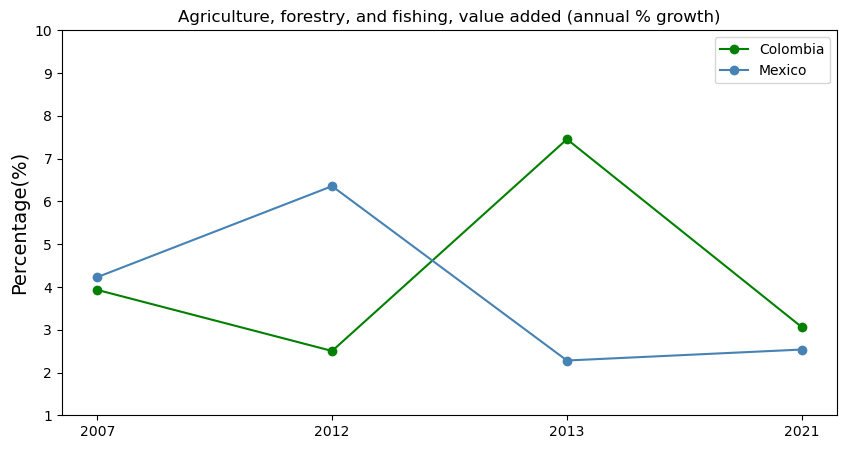

In [422]:
plt.subplots(figsize=(10, 5))
plt.plot(tre_employ[29], label='Colombia', color='green', marker='o')
plt.plot(cont_employ[29], label='Mexico', color='steelblue', marker='o')
plt.title('Agriculture, forestry, and fishing, value added (annual % growth)', fontsize=12)
plt.legend(title='Country')
plt.ylim(1,10)
plt.ylabel('Percentage(%)', fontsize=14)
#plt.figure(figsize=(15,100))
#plt.plot(range(10), linestyle='--', marker='o', color='b', label='line with marker')
plt.legend()

# SAVE DOCUMENT

In [ ]:
save_document(DID_df[DID_df['Series Name']=='Agricultural land (% of land area)'].sort_values(by='DID', ascending=False),'Agricultural land (% of land area)')

In [ ]:
save_document(DID_df[DID_df['Series Name']=='Employment in agriculture (% of total employment) (modeled ILO estimate)'].sort_values(by='DID', ascending=False),'Employment in agriculture (% of total employment) (modeled ILO estimate)')

In [ ]:
save_document(DID_df[DID_df['Series Name']=='Food exports (% of merchandise exports)'].sort_values(by='DID', ascending=False),'Food exports (% of merchandise exports)')

In [ ]:
save_document(DID_df[DID_df['Series Name']=='Food imports (% of merchandise imports)'].sort_values(by='DID', ascending=False),'Food imports (% of merchandise imports)')

In [ ]:
save_document(DID_df[DID_df['Series Name']=='Agriculture, forestry, and fishing, value added (annual % growth)'].sort_values(by='Treatment Dif', ascending=False),'Agriculture, forestry, and fishing, value added (annual % growth)')